In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz

In [2]:
usData = pd.read_csv('../Data/Youtube/cleaned_us.csv')
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


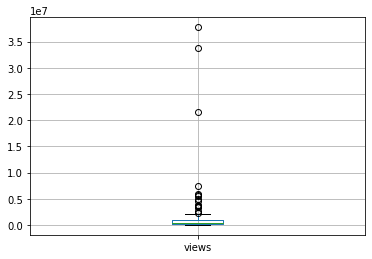

In [3]:
usData[usData.trending_date=="17.30.11"].boxplot(column='views')

In [4]:
usDataDates = usData.groupby("trending_date")
usDataDates.get_group('17.14.11').video_id.value_counts()

MyEqfBkzESU    1
DIU3xPdhCBI    1
xfmipNU4Odc    1
lY_0mkYDZDU    1
gEHCXl4J9Qo    1
              ..
1640fZpYBSY    1
g5c1bk8weaQ    1
fNtLIcyjsnI    1
BEweWXa5Twk    1
tOFkFZbPdnQ    1
Name: video_id, Length: 200, dtype: int64

This means that this dataset has the top 200 trending videos (Changing the date leads to the same number)

In [5]:
usDataDates.get_group('17.15.11').video_id.value_counts()

MyEqfBkzESU    1
i-LCORFB860    1
6Detw08jRhs    1
n30k5CwLhS4    1
pa_oUisZZy0    1
              ..
vZzIS17HexE    1
l7je4VAUvjA    1
XrDlDj9DfZs    1
g5c1bk8weaQ    1
cYw-oyJ7AEY    1
Name: video_id, Length: 200, dtype: int64

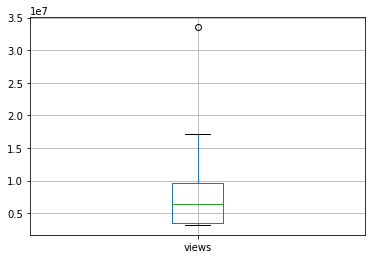

In [6]:
# reduce the amount to the top 10 to actually glean information from the graph
usDataDates.get_group('17.14.11').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

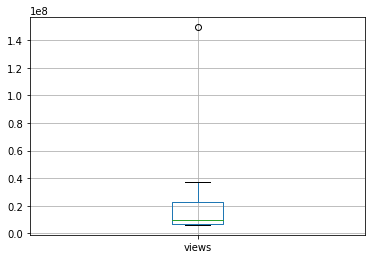

In [7]:
usDataDates.get_group('17.14.12').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

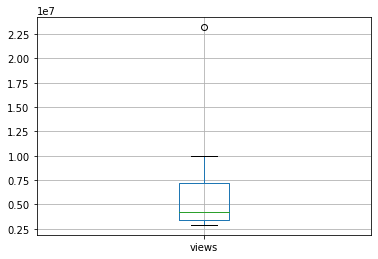

In [8]:
usDataDates.get_group('18.14.01').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

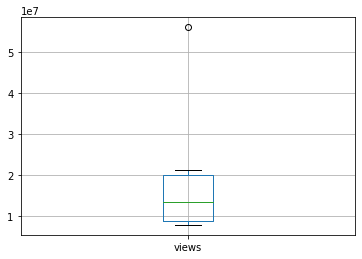

In [9]:
usDataDates.get_group('18.14.02').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

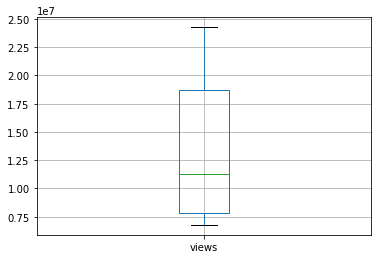

In [10]:
usDataDates.get_group('18.14.03').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

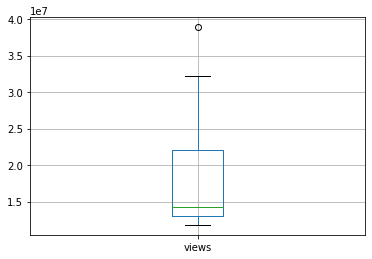

In [11]:
usDataDates.get_group('18.14.04').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

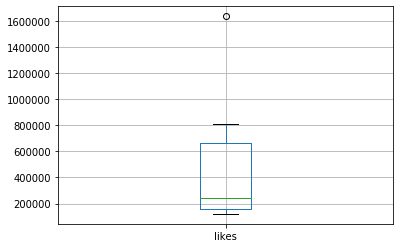

In [12]:
usDataDates.get_group('17.14.11').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

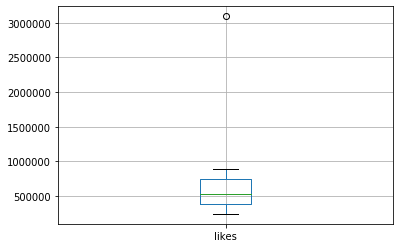

In [13]:
usDataDates.get_group('17.14.12').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

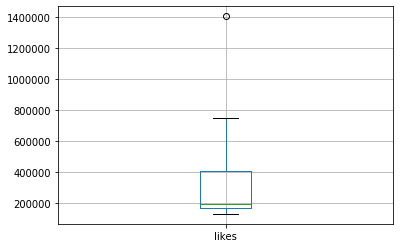

In [14]:
usDataDates.get_group('18.14.01').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

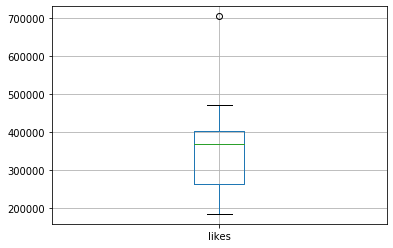

In [15]:
usDataDates.get_group('18.14.02').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

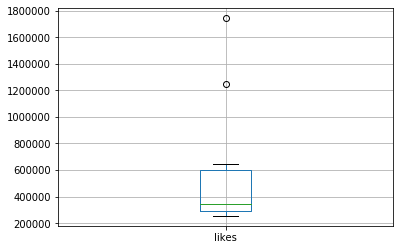

In [16]:
usDataDates.get_group('18.14.03').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

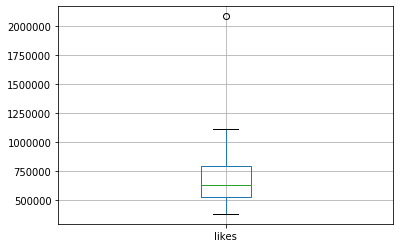

In [17]:
usDataDates.get_group('18.14.04').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

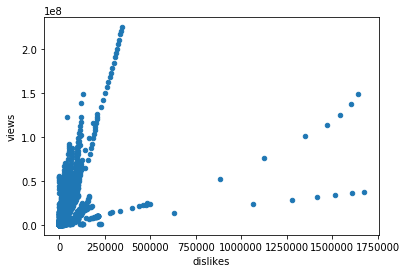

In [18]:
#plot dislikes verses other variables to try to find a trend
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='dislikes', y='views')

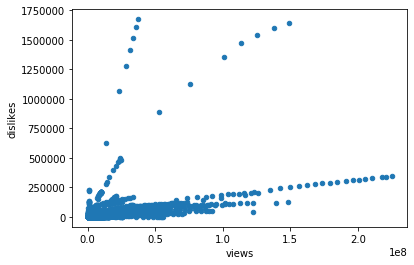

In [19]:
usData.sort_values(by=['views'], ascending=False).plot.scatter(x='views', y='dislikes')

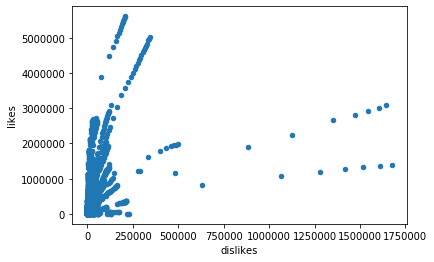

In [20]:
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='dislikes', y='likes')

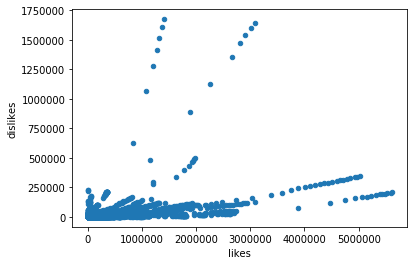

In [21]:
usData.sort_values(by=['likes'], ascending=False).plot.scatter(x='likes', y='dislikes')

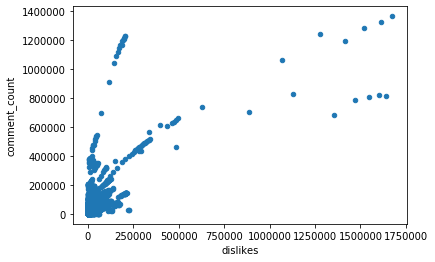

In [22]:
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='dislikes', y='comment_count')

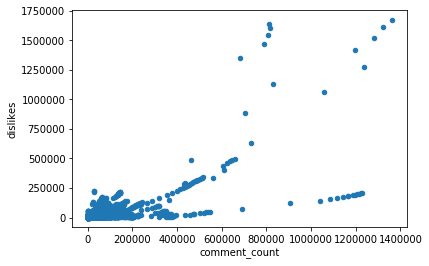

In [23]:
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='comment_count', y='dislikes')

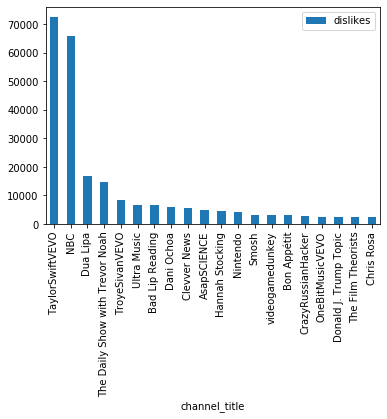

In [27]:
usDataDates.get_group('18.14.01').sort_values(by=['dislikes'], ascending=False).head(20).plot.bar(x='channel_title', y='dislikes')

In [31]:
usData2 = usData
usData2['rating'] = pd.qcut(usData.dislikes, q=2, labels=['good', 'bad'])
usData2.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,rating
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,bad
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,good
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,bad


In [56]:
usData2.rating.value_counts()

good    20454
bad     20447
Name: rating, dtype: int64

In [67]:
attributes = usData2.drop(['thumbnail_link', 'description', 'dislikes', 'tags', 'rating', 'category', 'publish_time', 'trending_date', 'video_id', 'title', 'channel_title'], axis=1)
target = usData2.rating

In [68]:
Tree = tree.DecisionTreeClassifier(max_depth=2)

In [69]:
Tree.fit(attributes,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

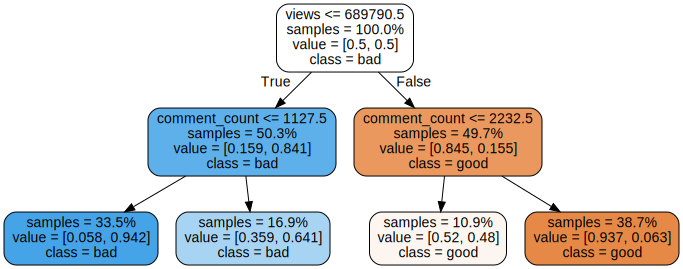

In [70]:
dot_data = tree.export_graphviz(Tree, out_file=None,
                                feature_names=attributes.columns,
                                class_names = ['good', 'bad'],
                                proportion=True,
                                impurity=False,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph.render('YouTube Dislikes')
graph

In [72]:
usData2['predict'] = Tree.predict(attributes)
incorrect = (usData2.rating != usData2.predict).sum()
incorrect/usData2.shape[0]

0.15684213099924207